<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1 : algoritmo para calcular la Transformada de Fourier (DFT)
#### Ariel Hipólito


## Introducción
En este trabajo implementaremos la **Transformada Discreta de Fourier (DFT)** de forma manual, para comprender mejor su funcionamiento interno.  
El objetivo es no depender únicamente de librerías como `numpy.fft.fft`, sino entender cómo se construye matemáticamente y cómo se implementa en código.  

Además, estudiaremos el **efecto del ruido uniforme** sobre una señal senoidal y veremos cómo se modifica su espectro en frecuencia.  

---

## Definición matemática de la DFT
La Transformada Discreta de Fourier (DFT) se define como:

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n] \, e^{-j \frac{2 \pi}{N} k n}, \quad k = 0,1,2,\dots,N-1\
\end{equation}

donde:
- $x[n] :$es la señal en el dominio del tiempo,
- $ X[k] : $es la representación en el dominio de la frecuencia,
- $ N :$ es la cantidad de muestras.
  
En una primera versión del código, implementamos la DFT con **bucles `for` anidados**, recorriendo los índices \(k\) y \(n\) para construir cada coeficiente $X[k]$:



In [1]:
#%% PRIMER FUNCION DFT: 

def mi_funcion_DFT(xx):
    """
    Calcula la Transformada Discreta de Fourier (DFT) de una señal xx.
    
    Parameters
    ----------
    xx : array-like, tamaño N
        Señal real de entrada.

    Returns
    -------
    XX : array-like, tamaño N
        DFT de xx, valores complejos.
    """
    N = len(xx)
    XX = np.zeros(N, dtype=complex)  # Vector de salida
    
    for k in range(N):  # cada frecuencia
        suma = 0
        for n in range(N):  # suma sobre la señal
            suma += xx[n] * np.exp(-1j * 2 * np.pi * k * n / N)
        XX[k] = suma
    
    return XX

Si bien este enfoque es didáctico (porque muestra claramente cómo se calcula cada término), presenta un costo computacional de **orden \(O(N^2)\)**, lo que lo vuelve ineficiente para señales largas.

En cambio, el enfoque de **producto matricial** utiliza la formulación:

\begin{equation}
\mathbf{X} = \mathbf{W} \cdot \mathbf{x}
\end{equation}

donde:
- $x$ es un vector columna con las muestras de la señal,
- $X$ es el vector columna con los coeficientes de la DFT,
- $W$ es la matriz cuyas entradas son:

\begin{equation}
W_{k,n} = e^{-j \frac{2 \pi}{N} k n}
\end{equation}

Este enfoque matricial permite implementar la DFT sin usar bucles anidados, aprovechando las operaciones vectorizadas de `NumPy`.
Este método es más **ventajoso** porque:

- Aprovecha las **operaciones vectorizadas de NumPy**, que están optimizadas .  
- El código es más **legible y compacto**: se reemplazan dos bucles anidados por una única operación matricial.  
- Permite extender el análisis a casos más complejos (por ejemplo, aplicar transformadas a múltiples señales a la vez).  
---


In [4]:
#%% FUNCION DFT MEJORADA: 
import numpy as np
def mi_funcion_DFT(xx):
    """
    Calcula la Transformada Discreta de Fourier (DFT) de una señal xx.
    usando producto matricial (sin for loops).
    
    Parameters
    ----------
    xx : array-like, tamaño N
        Señal real de entrada.

    Returns
    -------
    XX : array-like, tamaño N
        DFT de xx, valores complejos.
    """
    N = len(xx)
    n = np.arange(N) # vector fila (1 x N) -> tiempo
    k = np.expand_dims(n, axis=1) # vector columna (N x 1) -> frecuencia

    
    arg = ((-1) * 1j * 2 * np.pi) / N
    W = 1 * np.exp(arg * k * n)  # matriz NxN
    
    XX = np.dot(W, xx)  # producto matricial
    
    return XX  


Cada coeficiente $X[k]$ se obtiene como una **combinación lineal** de todos los $x[n]$, ponderados por los complejos $e^{-j2\pi kn/N}$.

Si agrupamos todos los posibles valores de $k$ en una matriz $W$ de tamaño $NxN$:

\begin{equation}
W[k,n] = e^{-j \frac{2\pi}{N}kn},
\end{equation}

Entonces podemos escribir la DFT en forma matricial como:

\begin{equation}
\mathbf{X} = \mathbf{W} \cdot \mathbf{x}
\end{equation}

Esto es **exactamente lo que hace** la instrucción de nuestro código:

```python
XX = np.dot(W, xx)


---

## Generación de una señal senoidal
A continuación definimos una función que genera una señal senoidal de amplitud, frecuencia, fase y offset ajustables.


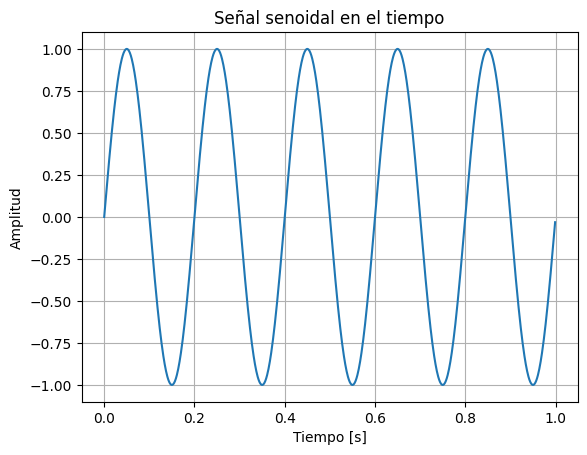

In [11]:
import matplotlib.pyplot as plt

fs = 1000   # frecuencia de muestreo
N = fs      # cantidad de muestras

#%% SENOIDAL:
def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=N , fs=fs):

    # grilla de sampleo temporal
    tt = np.arange(0, nn) / fs

    xx = vmax * np.sin(tt*2*np.pi*ff + ph) + dc

    return tt,xx

# Generamos una señal senoidal de prueba
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=5, ph=0, nn=N, fs=fs)

# Graficamos la señal en el tiempo
plt.figure()
plt.plot(tt, xx)
plt.title("Señal senoidal en el tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


---

## Cálculo de la DFT de la senoidal
Aplicamos la función `mi_funcion_DFT` sobre la señal generada.


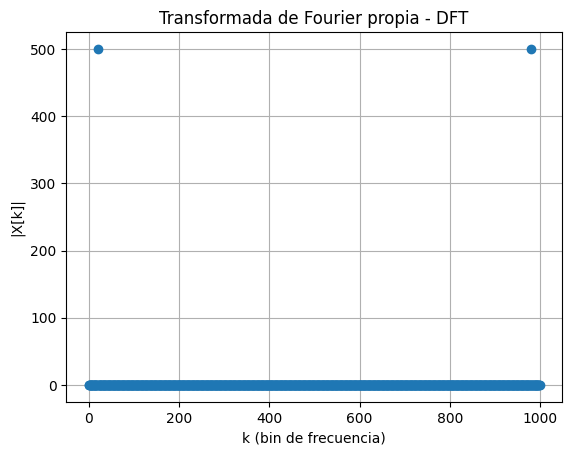

In [9]:
XX = mi_funcion_DFT(xx)

#GRAFICAMOS 
plt.figure()
plt.plot(np.abs(XX), "o")
plt.title("Transformada de Fourier propia - DFT")
plt.xlabel("k (bin de frecuencia)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

Recordando que la DFT de una senoidal de frecuencia f0, será una delta de Kronecker posicionada en la frecuencia f0 queda validada nuestras funciones. Ahora veremos que ocurre con las demas señales que creamos en el trabajo práctico anterior. 

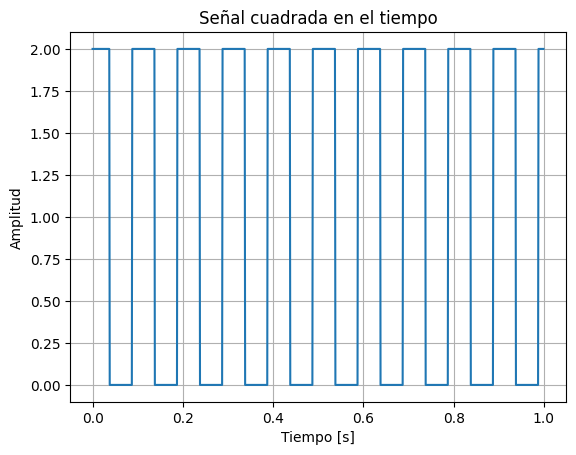

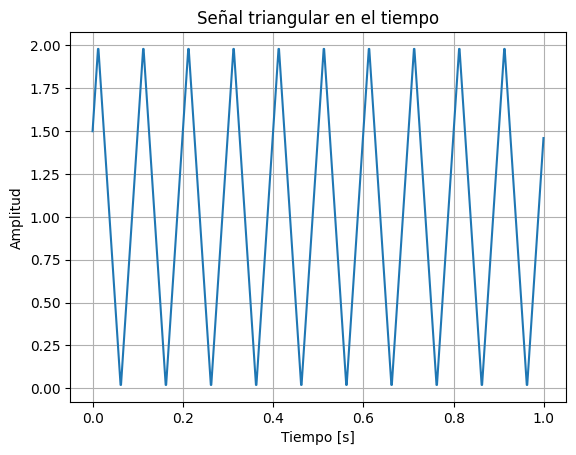

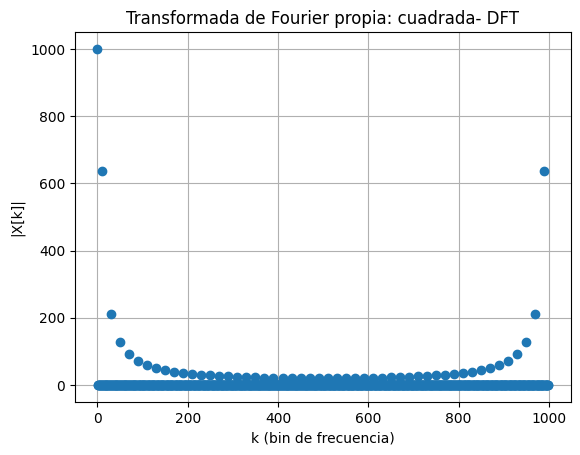

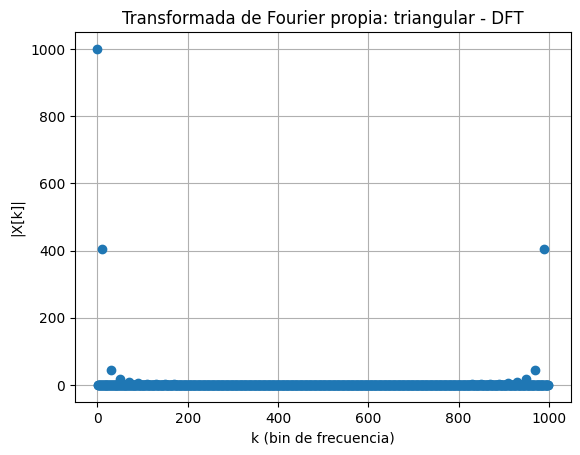

In [17]:
import matplotlib.pyplot as plt

fs = 1000   # frecuencia de muestreo
N = fs      # cantidad de muestras

def mi_funcion_trian(vmax=1, dc=0, ff=1, ph=0, nn=N, fs=fs):

    tt = np.arange(0, nn) / fs
    xx = dc + (2*vmax/np.pi) * np.arcsin(np.sin(2 * np.pi * ff * tt + ph))
    return tt, xx
    
def mi_funcion_cuad(vmax=1, dc=0, ff=1, ph=0, nn=N, fs=fs):

    tt = np.arange(0, nn) / fs
    xx = dc + vmax * np.sign(np.sin(2 * np.pi * ff * tt + ph))
    return tt, xx
    
tt_sq, sq = mi_funcion_cuad(vmax=1, dc=1, ff=10, ph=np.pi/4, nn=N, fs=fs)
tt_tria, tria = mi_funcion_trian(vmax=1, dc=1, ff=10, ph=np.pi/4, nn=N, fs=fs)

# Graficamos la señal en el tiempo
plt.figure()
plt.plot(tt_sq, sq)
plt.title("Señal cuadrada en el tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(tt_tria, tria)
plt.title("Señal triangular en el tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


XX_sq = mi_funcion_DFT(sq)
XX_tria = mi_funcion_DFT(tria)

#GRAFICAMOS 
plt.figure()
plt.plot(np.abs(XX_sq), "o")
plt.title("Transformada de Fourier propia: cuadrada- DFT")
plt.xlabel("k (bin de frecuencia)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.abs(XX_tria), "o")
plt.title("Transformada de Fourier propia: triangular - DFT")
plt.xlabel("k (bin de frecuencia)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

### CUADRADA:
- El espectro de la cuadrada es una serie de picos en los múltiplos impares de la fundamental, relativamente “ricos” en energía.
- La amplitud de esos armónicos decrece como $ \frac{1}{k}$ donde $k$ es el número del armónico impar.

### TRIANGULAR:
- También tiene solo armónicos impares pero su amplitud decrece mucho más rápido, como $ \frac{1}{k^2} $
- El espectro de la triangular es más “suave”, con pocos armónicos importantes (fundamental fuerte y los demás rápidamente muy chicos).

En base a esta experimentacion podemos corroborar que nuestra funcion DFT responde segun lo esperado. 

---
## BONUS: 
- Probar las mismas experiencias con la transformada rápida de Fourier (DFT rápida se llama FFT).
- Calcular la DFT de una señal aleatoria, por ejemplo ruido uniforme de varianza σ² = 4. Pueden encontrar cómo depende la varianza de los parámetros de la distribución [aquí](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme_continua).

---


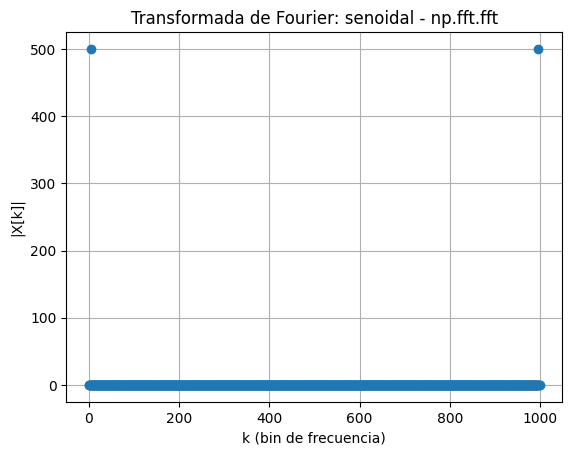

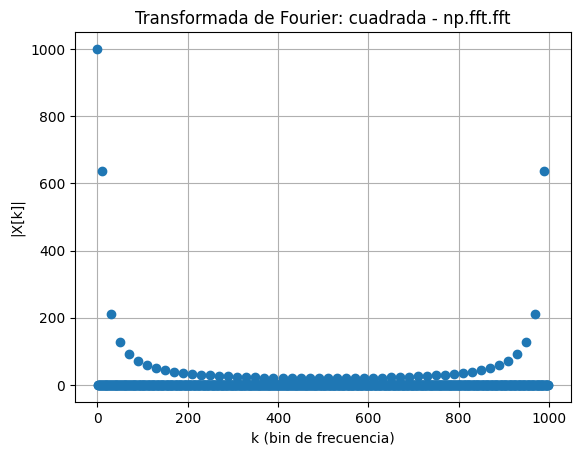

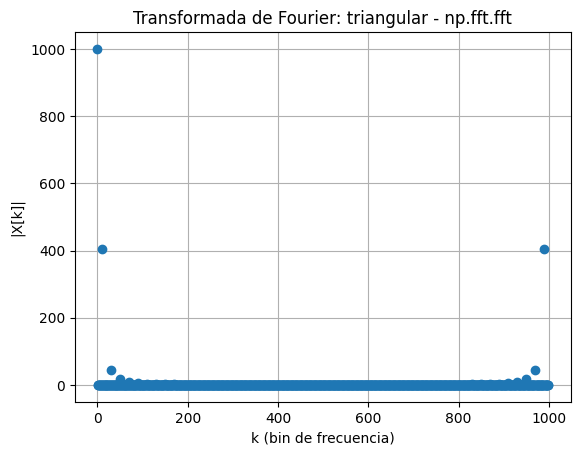

In [20]:
XX_sq = np.fft.fft(sq)
XX_tria = np.fft.fft(tria)
XX = np.fft.fft(xx)

#GRAFICAMOS 
plt.figure()
plt.plot(np.abs(XX), "o")
plt.title("Transformada de Fourier: senoidal - np.fft.fft")
plt.xlabel("k (bin de frecuencia)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.abs(XX_sq), "o")
plt.title("Transformada de Fourier: cuadrada - np.fft.fft")
plt.xlabel("k (bin de frecuencia)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.abs(XX_tria), "o")
plt.title("Transformada de Fourier: triangular - np.fft.fft")
plt.xlabel("k (bin de frecuencia)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

Al utilizar la funcion `numpy.fft.fft`corroboramos que la funcion creada funciona correctamente al obtener los mismos graficos. Ahora le acoplaremos a la funcion senoidal ruido pero para eso deberiamos recordar algunas cosas primero sobre *Distribucion Uniforme Continua*: 

\begin{align*}
\textbf{Media:} & \quad \mu = \frac{a + b}{2} \\
\textbf{Mediana:} & \quad \frac{a + b}{2} \\
\textbf{Moda:} & \quad \text{cualquier valor en } [a, b] \\
\textbf{Varianza:} & \quad \sigma^2 = \frac{(b - a)^2}{12} \\
\textbf{Coeficiente de simetría:} & \quad 0 \\
\textbf{Curtosis:} & \quad -\frac{6}{5} \\
\textbf{Entropía:} & \quad \ln(b - a)
\end{align*}

Con esto en mente procederemos a crear el ruido en nuestro codigo para acoplarlo a la señal senoidal y ademas corroboraremos con la funcion `numpy.fft.fft`

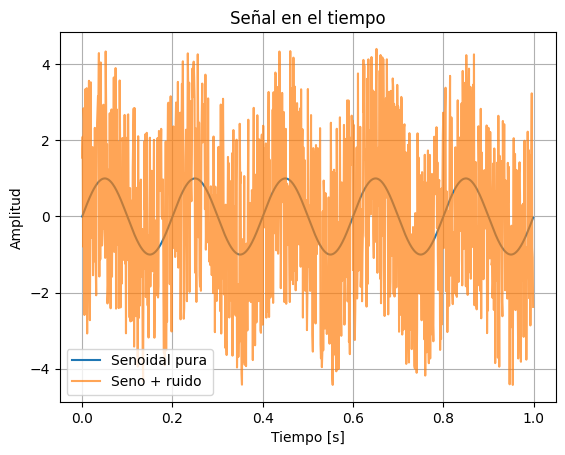

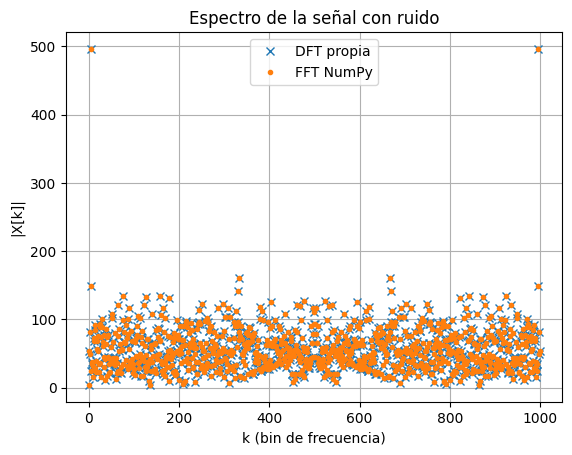

In [25]:
# Ruido uniforme con varianza = 4
# Como varianza = (b-a)^2 / 12 --> 4 = (b-a)^2 / 12 --> b - a = sqrt(48) 
# Y para que el intervalo sea simétrico alrededor de 0 (lo cual es común en ruido), definimos:
a = -np.sqrt(12*4)/2
b =  np.sqrt(12*4)/2
ruido = np.random.uniform(a, b, N)

# Señal total
xx_ruido = xx + ruido

XX_ruido = mi_funcion_DFT(xx_ruido)
XX_fft_ruido = np.fft.fft(xx_ruido)

#%% GRAFICOS

# Señales en el tiempo
plt.figure()
plt.plot(tt, xx, label="Senoidal pura")
plt.plot(tt, xx_ruido, label="Seno + ruido", alpha=0.7)
plt.title("Señal en el tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# Espectros
plt.figure()
plt.plot(np.abs(XX_ruido), "x", label="DFT propia")
plt.plot(np.abs(XX_fft_ruido), ".", label="FFT NumPy")
plt.title("Espectro de la señal con ruido")
plt.xlabel("k (bin de frecuencia)")
plt.ylabel("|X[k]|")
plt.legend()
plt.grid(True)
plt.show()

La adición de ruido uniforme de varianza 4 hace que el espectro no presente picos tan definidos como en el caso de la señal senoidal pura, ya que la energía del ruido se reparte en todas las frecuencias. La comparación entre la funcion DFT propia y la FFT de NumPy muestra coincidencia en los resultados, validando nuestra implementación.

## Efecto del ruido en la DFT

Cuando analizamos la Transformada Discreta de Fourier (DFT) de una señal, una senoidal pura aparece representada por uno o dos picos bien definidos en la frecuencia fundamental (y su simétrica).

Sin embargo, cuando la señal se ve afectada por ruido aleatorio uniforme, el espectro cambia:

### - Distribución en todas las frecuencias
El ruido uniforme no tiene una frecuencia dominante, por lo que introduce componentes espectrales a lo largo de todo el ancho de banda. Esto se observa en la DFT como un "piso de ruido" que acompaña al pico de la senoidal.

### - Relación señal/ruido (SNR)
A medida que la varianza del ruido aumenta $(\sigma^2$ más grande), la energía del ruido en el dominio de la frecuencia también crece. El efecto visible es que el pico de la senoidal se vuelve menos sobresaliente respecto al resto del espectro.

### - Interpretación práctica
- Con varianza baja, la senoidal todavía es fácil de identificar en la DFT.
- Con varianza alta, el ruido domina y el espectro pierde claridad, dificultando distinguir la frecuencia de la señal original.

---

**En resumen:** la varianza del ruido controla cuánto "ensucia" el espectro de la señal en frecuencia: cuanto mayor es, menos distinguible resulta la componente periódica respecto al ruido de fondo.
